<a href="https://colab.research.google.com/github/frianlh/DataMining-Project/blob/main/Case_Study_3_Group_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statment**

## **Market Basket Analysis Toko AlfaIndo Cabang UI Depok**

* AlfaIndo adalah sebuah toko waralaba yang memiliki beberapa cabang di kota-kota besar di Indonesia seperti Jakarta, Depok, Surabaya, dan Medan.
* Anda adalah seorang Data Analyst yang bekerja di kantor pusat AlfaIndo di Jakarta.
* Pasca masa pandemi Toko AlfaIndo cabang UI Depok mengalami penurunan laba yang signifikan.
* Anda ditugaskan oleh pimpinan untuk membantu toko AlfaIndo cabang UI Depok untuk bangkit dari keterpurukannya.

Produk yang terdapat di AlfaIndo adalah sebagai berikut.

| ID Produk | Nama Produk | Merek |
| :---: | :--- | :--- |
| 1 | Roti | Sri Roti |
| 2 | Air Minum | Aquos |
| 3 | Roti | Prambanan |
| 4 | Sabun | Lifboy |
| 5 | Shampoo | Clean |
| 6 | Snack | Chiki |
| 7 | Sabun | Luks |
| 8 | Snack | Citata |
| 9 | Rokok | Malioboro |
| 10 | Air Minum | Sprit |
| 11 | Mie Instan | Indomi |
| 12 | Mie Instan | Mi Sedap |

## **Main Focused**

1. Bagaimana cara meningkatkan profit Toko AlfaIndo?
2. Pasangan produk apa saja yang memiliki asosiasi tinggi dan dapat meningkatkan profit Toko AlfaIndo?

# **Modules**

In [ ]:
# Install Module
try:
    import google.colab as gc_
    print("Running the code in Google Colab.", gc_) #IN_COLAB = True
    print("Installing required Module, please wait ... ")
    !pip install mlxtend 
    !pip install pycaret
except:
    print("Running the code locally, make sure to install required modules.") #IN_COLAB = False

Running the code in Google Colab. <module 'google.colab' from '/usr/local/lib/python3.7/dist-packages/google/colab/__init__.py'>
Installing required Module, please wait ... 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import Module
import warnings; warnings.simplefilter('ignore')
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from itertools import combinations
from collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from pycaret.arules import *

%matplotlib inline
plt.style.use('bmh'); sns.set()

# **Data Set**

In [ ]:
# Import Data Set
file_ = 'data/Transaksi.csv'
try: # Running Locally
    customer = pd.read_csv(file_, low_memory = False, encoding = 'utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/frianlh/DataMining-Project/main/data/Transaksi.csv
    transaksi = pd.read_csv(file_, low_memory = False, encoding = 'utf8')

In [ ]:
# Show The First Five Data
transaksi.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1.0,01/07/2022 0:00,Mr. A,1,Roti,Sri Roti,2
1,NaN,NaN,NaN,2,Air Minum,Aquos,1
2,NaN,NaN,NaN,11,Mie Instan,Indomi,2
3,NaN,NaN,NaN,12,Mie Instan,Mi Sedap,1
4,2.0,01/07/2022 0:00,Mr. B,2,Air Minum,Aquos,1


In [ ]:
# Show The Last Five Data
transaksi.tail()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
51,NaN,NaN,NaN,2,Air Minum,Aquos,1
52,NaN,NaN,NaN,4,Sabun,Lifboy,1
53,NaN,NaN,NaN,6,Snack,Chiki,2
54,18.0,02/10/2022 0:00,Mr. B,1,Roti,Sri Roti,2
55,NaN,NaN,NaN,10,Air Minum,Sprit,2


In [ ]:
# Data Size
N, P = transaksi.shape
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)

# Variable Type
print("Tipe Variabel df = ", type(transaksi))

baris =  56 , Kolom (jumlah variabel) =  7
Tipe Variabel df =  <class 'pandas.core.frame.DataFrame'>


In [ ]:
# Data Information
transaksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID Transaksi  18 non-null     float64
 1   Tanggal       18 non-null     object 
 2   Konsumen      18 non-null     object 
 3   ID Produk     56 non-null     int64  
 4   Nama Produk   56 non-null     object 
 5   Merek         56 non-null     object 
 6   Jumlah        56 non-null     int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 3.2+ KB


Note:
- Pada data yang diberikan, terdapat beberapa tipe data yang perlu diperbaiki, yaitu `Tanggal`, `ID Transaksi`, `Nama Produk`, dan `Merek`.
- `Tanggal` seharusnya memiliki tipe data datetime.
- `ID Transaksi` seharusnya memiliki tipe data integer.
- `Nama Produk` dan `Merek` sehanrusnya memiliki tipe data category.
- Selain itu, Data Engineer memberikan data dengan struktur yang mana pada setiap item tidak diberikan `ID Transaksi` dan `Tanggal`, melainkan hanya pada item pertama untuk setiap transaksi. Sebagai rekomendasi, Data Engineer dapat memberikan informasi `ID Transaksi` dan `Tanggal` pada setiap item.

# **Pre Processing**

In [ ]:
# Copy Data
df = transaksi.copy()

In [ ]:
# Input data NaN in column ID Transaksi, Tanggal, and Konsumen
df.ffill(axis = 0, inplace = True)
df.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1.0,01/07/2022 0:00,Mr. A,1,Roti,Sri Roti,2
1,1.0,01/07/2022 0:00,Mr. A,2,Air Minum,Aquos,1
2,1.0,01/07/2022 0:00,Mr. A,11,Mie Instan,Indomi,2
3,1.0,01/07/2022 0:00,Mr. A,12,Mie Instan,Mi Sedap,1
4,2.0,01/07/2022 0:00,Mr. B,2,Air Minum,Aquos,1


Note: Karena pada data sebelumnya terdapat missing values, maka diasumsikan bahwa missing values tersebut memiliki values yang sama dengan row yang ada di atasnya atau dengan kata lain item-item pada missing values memiliki `ID Transaksi` dan `Tanggal` yang sama sesuai dengan baris pertama pada setiap produk.

In [ ]:
# Correction Data Type
df["Tanggal"] = pd.to_datetime(df["Tanggal"])
df["Tanggal"] = df["Tanggal"].dt.strftime("%d/%m/%Y")
df["Tanggal"] = pd.to_datetime(df["Tanggal"])
df["ID Transaksi"] = df["ID Transaksi"].astype("int64")
df["Nama Produk"] = df["Nama Produk"].astype("category")
df["Merek"] = df["Merek"].astype("category")

In [ ]:
# Add Column Bulan dan Hari
df["Bulan"] = df["Tanggal"].dt.month
df["Hari"] = df["Tanggal"].dt.day_name()
df.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah,Bulan,Hari
0,1,2022-07-01,Mr. A,1,Roti,Sri Roti,2,7,Friday
1,1,2022-07-01,Mr. A,2,Air Minum,Aquos,1,7,Friday
2,1,2022-07-01,Mr. A,11,Mie Instan,Indomi,2,7,Friday
3,1,2022-07-01,Mr. A,12,Mie Instan,Mi Sedap,1,7,Friday
4,2,2022-07-01,Mr. B,2,Air Minum,Aquos,1,7,Friday


Note: Pada EDA selanjutnya akan dilihat penjualan berdasarkan Bulan dan Hari sehingga ditambahkan kolom baru, yaitu Bulan dan Hari.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID Transaksi  56 non-null     int64         
 1   Tanggal       56 non-null     datetime64[ns]
 2   Konsumen      56 non-null     object        
 3   ID Produk     56 non-null     int64         
 4   Nama Produk   56 non-null     category      
 5   Merek         56 non-null     category      
 6   Jumlah        56 non-null     int64         
 7   Bulan         56 non-null     int64         
 8   Hari          56 non-null     object        
dtypes: category(2), datetime64[ns](1), int64(4), object(2)
memory usage: 4.0+ KB


Note: `Bulan` dan `Hari` seharusnya memiliki tipe data category

In [ ]:
# Correction Data Type untuk Bulan dan Hari
df["Bulan"] = df["Bulan"].astype("category")
df["Hari"] = df["Hari"].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID Transaksi  56 non-null     int64         
 1   Tanggal       56 non-null     datetime64[ns]
 2   Konsumen      56 non-null     object        
 3   ID Produk     56 non-null     int64         
 4   Nama Produk   56 non-null     category      
 5   Merek         56 non-null     category      
 6   Jumlah        56 non-null     int64         
 7   Bulan         56 non-null     category      
 8   Hari          56 non-null     category      
dtypes: category(4), datetime64[ns](1), int64(3), object(1)
memory usage: 3.8+ KB


In [ ]:
# Duplicate Check
print(df.duplicated().sum())

# Show the Duplicate Data
df[df.duplicated()]

0


,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah,Bulan,Hari


Note: No duplicate values

In [ ]:
# Get Total Missing Values
print(df.isnull().sum())

ID Transaksi    0
Tanggal         0
Konsumen        0
ID Produk       0
Nama Produk     0
Merek           0
Jumlah          0
Bulan           0
Hari            0
dtype: int64


Note: No missing values

In [ ]:
# Desciptive Statistics
df.describe(include = "all")

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah,Bulan,Hari
count,56.000000,56,56,56.000000,56,56,56.000000,56.0,56
unique,NaN,11,12,NaN,7,12,NaN,4.0,7
top,NaN,2022-07-05 00:00:00,Mr. B,NaN,Air Minum,Chiki,NaN,7.0,Monday
freq,NaN,9,15,NaN,11,7,NaN,49.0,10
first,NaN,2022-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2022-10-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8.660714,NaN,NaN,6.250000,NaN,NaN,1.500000,NaN,NaN
std,5.085726,NaN,NaN,3.475891,NaN,NaN,0.572078,NaN,NaN
min,1.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN
25%,4.000000,NaN,NaN,3.750000,NaN,NaN,1.000000,NaN,NaN


In [ ]:
df[df['Nama Produk'] == 'Air Minum']['Merek'].value_counts()

Sprit        6
Aquos        5
Chiki        0
Citata       0
Clean        0
Indomi       0
Lifboy       0
Luks         0
Malioboro    0
Mi Sedap     0
Prambanan    0
Sri Roti     0
Name: Merek, dtype: int64

Note:
- Berdasarkan statistika deskriptif di atas, tidak terdapat noise pada data.
- Jika dilihat berdasarkan jenis produk, penjualan tertinggi adalah air minum di mana Sprit terjual 6 item dan Aquos terjual 5 item.
- Namun, jika dilihat berdasarkan merek, Chiki memiliki penjualan tertinggi yaitu sejumlah 7 item.
- Penjualan cenderung tinggi pada bulan Juli dan hari Senin, hal ini akan dianalisis lebih lanjut pada bagian EDA.

# **Exploratory Data Analysis**

## Check Outlier

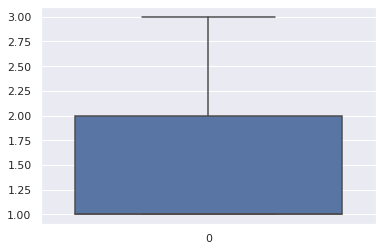

In [ ]:
# Detecting Outlier
p = sns.boxplot(data = df["Jumlah"])

Berdasarkan boxplot di atas, diketahui bahwa pada range 1 Juli 2022 - 2 Oktober 2022 tidak terdeteksi adanya outlier pada variabel jumlah.

## **Case 1**

Bagaimana *trend* total penjualan per bulan berdasarkan **jumlah produk yang terjual** dari data transaksi di AlfaIndo.

Akan dilihat jumlah produk yang terjual di AlfaIndo yang dikelompokkan dalam bulan dan dalam tahun. 

In [ ]:
# Data Total Sells Group By Bulan
x1 = df.groupby(["Bulan"]).agg(
    Total = ("Jumlah", "sum")).reset_index()
x1

,Bulan,Total
0,7,72
1,8,2
2,9,6
3,10,4


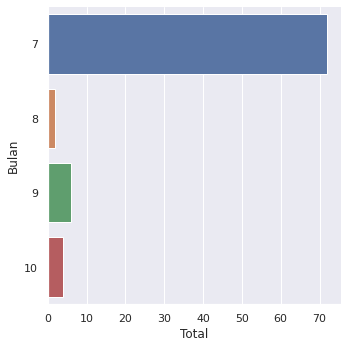

In [ ]:
# Plot Total Sells Group By Tahun
p = sns.catplot(data = x1.sort_values(by = "Bulan"), x = "Total", y = "Bulan", kind = "bar")

Berdasarkan data, terlihat bahwa total penjualan terbanyak ada di bulan Juli (bulan 7) dan total penjualan paling sedikit ada di bulan Agustus (bulan 8). Dalam hal ini dapat dilihat bahwa memang total penjualan menurun pada bulan Agustus hingga Oktober. Sebagai bahan rekomendai bagi perusahaan, produk yang belum dijual di bulan Agustus dan September perlu diperhatikan expired date untuk memastikan produk yang belum terjual di bulan Agustus dan September masih dapat dijual di bulan Oktober. Selain itu, perusahaan dapat mengurangi barang yang akan direstock dengan asumsi terdapat beberapa barang yang belum berhasil dijual di bulan Agustus dan September.

## **Case 2**

* Berapakah total penjualan berdasarkan **merek produk** dan **nama produk** yang terjual dari data transaksi di AlfaIndo.

* Produk manakah yang **paling sering** dan **paling jarang** dibeli oleh Konsumen di AlfaIndo pada beberapa tahun terakhir.

Akan dilakukan analisis terkait total penjualan berdasarkan merek produk dan nama produk yang terjual per bulan dari data transaksi di AlfaIndo.

In [ ]:
# Data Total Sells Group by Bulan and Merek Produk
x2 = df.groupby(["Bulan", "Merek"]).agg(
    Total = ("Jumlah", "sum")).reset_index()
x2

,Bulan,Merek,Total
0,7,Aquos,3
1,7,Chiki,9
2,7,Citata,5
3,7,Clean,7
4,7,Indomi,10
5,7,Lifboy,5
6,7,Luks,4
7,7,Malioboro,5
8,7,Mi Sedap,5
9,7,Prambanan,4


Berdasarkan data, dapat dilihat bahwa untuk merek produk, Indomie memiliki total penjualan paling tinggi di mana seluruh pembeliannya terjadi di bulan Juli (bulan 7), sedangkan Aquos memiliki total penjualan yang relatif rendah dibandingkan dengan merek-merek yang lain. Indomie, Clean, Citata, Luks, Malioboro, Mi Sedap, dan Prambanan memiliki total penjualan yang hanya terjadi di bulan Juli (bulan ke- 7). Aquos dan Sri Roti memiliki total penjualan yang terjadi pada tiga bulan, dengan mayoritas penjualan tetap terjadi pada bulan Juli. Chiki dan Liftboy memiliki total penjualan yang terjadi pada dua bulan, yaitu bulan Juli dan September. Sri Roti adalah satu-satunya merek yang memiliki total penjualan pada bulan Agustus. Secara keseluruhan, total penjualan dalam kategori merek didominasi pada bulan Juli dan paling sedikit di bulan Agustus. 

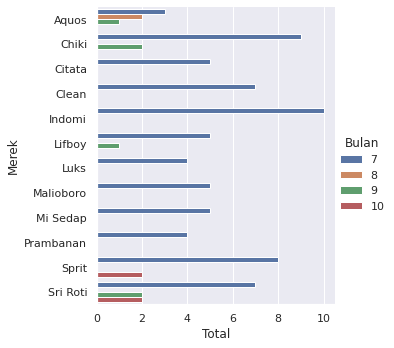

In [ ]:
# Plot Total Sells Group by Bulan and Merek Produk
p = sns.catplot(data = x2, x = "Total", y = "Merek", hue = "Bulan", kind = "bar")

In [ ]:
# Data Total Sells Group by Bulan and Nama Produk
x3 = df.groupby(["Bulan", "Nama Produk"]).agg(
    Total = ("Jumlah", "sum")).reset_index()
x3

,Bulan,Nama Produk,Total
0,7,Air Minum,11
1,7,Mie Instan,15
2,7,Rokok,5
3,7,Roti,11
4,7,Sabun,9
5,7,Shampoo,7
6,7,Snack,14
7,8,Air Minum,2
8,8,Mie Instan,0
9,8,Rokok,0


Untuk nama produk, Mie Instan memiliki total penjualan paling tinggi di mana seluruh pembeliannya terjadi di bulan Juli (bulan 7). Air minum memiliki total penjualan yang paling sering di beli dengan pembelian yang terjadi pada Juli (bulan 7), Agustus (bulan 8), September (bulan 9), dan Oktober (bulan 10). Total penjualan pada Mie Instan, Rokok, dan Shampoo hanya terjadi pada bulan Juli. Sabun dan Snack memiliki total penjualan yang terjadi pada bulan Juli dan September. Roti memiliki total penjualan pada bulan Juli (bulan 7), September (bulan 8), dan Oktober (bulan 10). Air minum merupakan satu-satunya nama produk yang memiliki total penjualan pada bulan Agustus (bulan 8). Sama halnya dengan kategori merek, secara keseluruhan total penjualan dalam kategori nama produk didominasi pada bulan ke-7 dan paling sedikit pada bulan ke-8. 

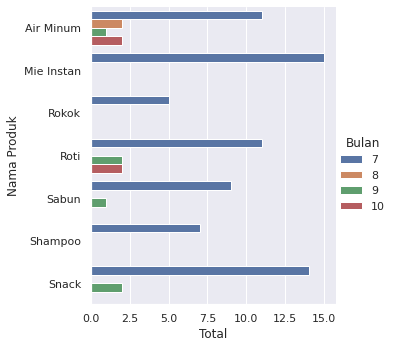

In [ ]:
# Plot Total Sells Group by Bulan and Merek Produk
p = sns.catplot(data = x3, x = "Total", y = "Nama Produk", hue = "Bulan", kind = "bar")

In [ ]:
# Data Total Sells Group By Bulan and Merek Produk
pd.crosstab(df["Bulan"], df["Merek"])

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
Bulan,,,,,,,,,,,,
7,3,6,2,6,5,4,3,5,3,3,5,4
8,1,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,1,0,0,0,0,0,1
10,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
# Data Total Sells Group By Bulan and Nama Produk
pd.crosstab(df["Bulan"], df["Nama Produk"])

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
Bulan,,,,,,,
7,8,8,5,7,7,6,8
8,1,0,0,0,0,0,0
9,1,0,0,1,1,0,1
10,1,0,0,1,0,0,0


Selanjutnya, akan dilakukan analisis terkait produk mana yang paling sering dan paling jarang dibeli oleh konsumen di AlfaIndo pada beberapa bulan terakhir.
Berdasarkan data, produk yang paling sering dibeli pada bulan Juli adalah Mie Instan, sedangkan untuk produk yang paling jarang dibeli adalah Shampoo. Pada bulan Agustus, produk yang paling banyak dibeli adalah Air Minum, sementara itu, tidak ada pembelian untuk produk lainnya. Pada bulan September, beberapa produk yang paling banyak dibeli adalah Roti, Snack, Air Minum, dan Sabun. Pada bulan Oktober, produk yang paling banyak dibeli adalah Air minum dan Roti.
Pada bulan Agustus, ketujuh produk tersebut mengalami penurunan pembelian. Namun, pada bulan September terdapat satu pembelian pada produk Roti, Snack, Air Minum, dan Sabun. Lalu, pada bulan Oktober, Sabun dan Snack mengalami penurunan pembelian, sementara untuk Air Minum dan Roti berjumlah sama.
Pada bulan Agustus, setiap merek produk pada data mengalami penurunan. Pada bulan September, merek Aquos relatif berjumlah sama dengan bulan sebelumnya. Merek Chiki, Lifboy, dan Sri Roti mengalami kenaikan. Ada pun pada bulan Oktober, Sri Roti relatif berjumlah sama dengan bulan sebelumnya.


Kemudian akan diberikan rekomendasi:<br>
Pada bulan September-Oktober, evaluasi ketersediaan produk Air Minum dan Roti dengan merek Sprit dan Sri Roti karena permintaan pada produk dan merek tersebut naik kembali, lalu mengurangi ketersediaan produk untuk Sabun dan Snack.


## **Case 3**
Bagaimana *trend* **total konsumen** per bulan dari data transaksi di AlfaIndo.

Akan dilihat bagaimana trend total konsumen per bulan dari data transaksi di AlfaIndo. 


In [ ]:
# Data Total Consument Group By Tahun
df.groupby(["Bulan"]).agg(
    Total = ("Konsumen", "unique")).reset_index()

,Bulan,Total
0,7,"[Mr. A, Mr. B, Mr. C, Mr. D, Mr. Z, Mr. X, Mr...."
1,8,[Mr. J]
2,9,[Mr. X]
3,10,[Mr. B]


Terdapat perbedaan yang signifikan pada bulan Juli dibanding bulan-bulan lainnya. Berdasarkan data, total customer pada bulan Agustus hingga Oktober cenderung mengalami penurunan. Untuk meningkatkan loyalitas customer, Toko AlfaIndo dapat mempertimbangkan untuk memberikan poin/reward kepada customer tersebut tergantung pada pembelian. Sebagai contoh, apabila 1 transaksi terdapat 5 item yang terjual, maka customer akan mendapatkan 1 poin. Nantinya, poin tersebut dapat ditukarkan dengan produk yang stoknya masih banyak di toko.

## **Case 4**

Bagaimana pola **belanja konsumen** per hari dari data transaksi di AlfaIndo.

Akan dilihat bagaimana pola belanja konsumen per hari dari data transaksi di AlfaIndo.

In [ ]:
# Data Pola Consument Group By Hari
x5 = df.groupby(["Hari", "Bulan"]).agg(
    Total = ("Jumlah", "count")).reset_index()
x5

,Hari,Bulan,Total
0,Friday,7,9
1,Friday,8,0
2,Friday,9,0
3,Friday,10,0
4,Monday,7,6
5,Monday,8,0
6,Monday,9,4
7,Monday,10,0
8,Saturday,7,8
9,Saturday,8,0


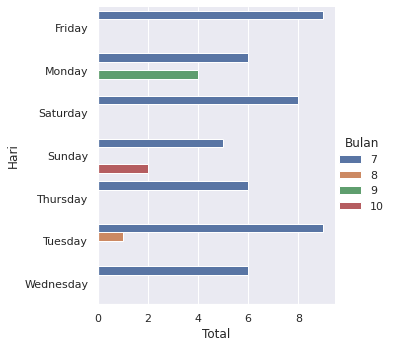

In [ ]:
# Plot Pola Consument Group By Hari
p = sns.catplot(data = x5, x = "Total", y = "Hari", hue = "Bulan", kind = "bar")

Berdasarkan hasil yang diperoleh, terlihat bahwa total penjualan di setiap harinya relatively mengalami penurunan dari bulan ke-7 hingga bulan ke-10. Penjualan cenderung tinggi pada bulan ke-7. Namun pada hari senin, terlihat bahwa terjadi peningkatan penjualan pada bulan ke-9 padahal sebelumnya tidak terdapat transaksi pada bulan ke-8 pada hari Senin, Hal ini juga terjadi pada hari Minggu bulan ke-10 dan hari Selasa bulan ke-8. Hal ini perlu diselidiki lebih lanjut oleh perusahaan mengapa hal ini dapat terjadi, mungkin bisa dikarenakan stok barang yang habis ataupun kurangnya promosi dari perusahaan. Agar penjualan dapat stabil tiap bulannya, perusahaan dapat membuat penawaran/promo yang menarik tiap bulannya untuk menarik minat konsumen, selain itu ketersediaan stok barang juga perlu diperhatikan.

# **Association Rule**

## **Transforming Data**

In [ ]:
df_ar = df.copy()
df_ar.drop(columns = ["Hari", "Bulan"], inplace = True)
df_ar.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1,2022-07-01,Mr. A,1,Roti,Sri Roti,2
1,1,2022-07-01,Mr. A,2,Air Minum,Aquos,1
2,1,2022-07-01,Mr. A,11,Mie Instan,Indomi,2
3,1,2022-07-01,Mr. A,12,Mie Instan,Mi Sedap,1
4,2,2022-07-01,Mr. B,2,Air Minum,Aquos,1


In [ ]:
# Group The Transaction
df_ar = df_ar.groupby(["ID Transaksi", "Merek"])["Jumlah"]
df_ar.head()

0     2
1     1
2     2
3     1
4     1
5     2
6     1
7     1
8     1
9     1
10    1
11    2
12    2
13    3
14    1
15    2
16    1
17    2
18    2
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    3
27    2
28    1
29    1
30    2
31    1
32    2
33    1
34    2
35    2
36    2
37    1
38    2
39    1
40    2
41    1
42    1
43    2
44    1
45    2
46    2
47    1
48    1
49    2
50    2
51    1
52    1
53    2
54    2
55    2
Name: Jumlah, dtype: int64

In [ ]:
# Summing, Unstack, Input Null With 0, Index Using ID Transaksi
df_ar = df_ar.sum().unstack().reset_index().fillna(0).set_index("ID Transaksi")
df_ar.head()

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1,0,0,0,2,0,0,0,1,0,0,2
2,1,2,0,1,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,1,0,0,0,0
4,0,0,3,0,0,0,1,0,2,0,2,2
5,0,1,0,0,0,0,0,0,0,0,2,0


In [ ]:
df_ar.tail()

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
14,0,1,0,2,0,0,2,0,0,0,0,0
15,0,0,0,0,0,0,0,1,0,0,0,0
16,2,0,0,0,0,0,0,0,0,0,0,0
17,1,2,0,0,0,1,0,0,0,0,0,2
18,0,0,0,0,0,0,0,0,0,0,2,2


In [ ]:
# One-Hot Encoding
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

df_ar_sets = df_ar.applymap(encode_units) # one-hot encoding
df_ar_sets.head()

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1,0,0,0,1,0,0,0,1,0,0,1
2,1,1,0,1,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,1,0,1,1
5,0,1,0,0,0,0,0,0,0,0,1,0


## **Data Understanding**

In [ ]:
# Get Columns
df_ar_sets.columns

Index(['Aquos', 'Chiki', 'Citata', 'Clean', 'Indomi', 'Lifboy', 'Luks',
       'Malioboro', 'Mi Sedap', 'Prambanan', 'Sprit', 'Sri Roti'],
      dtype='object', name='Merek')

In [ ]:
# Get Index
df_ar_sets.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], dtype='int64', name='ID Transaksi')

In [ ]:
# Get Data per Row
df_ar_sets.iloc[0]

Merek
Aquos        1
Chiki        0
Citata       0
Clean        0
Indomi       1
Lifboy       0
Luks         0
Malioboro    0
Mi Sedap     1
Prambanan    0
Sprit        0
Sri Roti     1
Name: 1, dtype: int64

In [ ]:
# Get Total Item per Row
df_ar_sets.iloc[0].sum()

4

## **Rule**

In [ ]:
# Frequent Items
frequent_itemsets = apriori(df_ar_sets, min_support = 0.07, use_colnames = True)
frequent_itemsets.sort_values(by = "support", ascending = False, na_position = "last", inplace = True)
frequent_itemsets

,support,itemsets
1,0.388889,(Chiki)
3,0.333333,(Clean)
10,0.333333,(Sprit)
11,0.333333,(Sri Roti)
0,0.277778,(Aquos)
4,0.277778,(Indomi)
5,0.277778,(Lifboy)
7,0.277778,(Malioboro)
16,0.166667,"(Clean, Chiki)"
28,0.166667,"(Indomi, Lifboy)"


In [ ]:
# Rules
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.sort_values(by = "lift", ascending = False, na_position = "last", inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
97,"(Sri Roti, Chiki)","(Aquos, Lifboy)",0.111111,0.111111,0.111111,1.000000,9.000000,0.098765,inf
96,"(Aquos, Lifboy)","(Sri Roti, Chiki)",0.111111,0.111111,0.111111,1.000000,9.000000,0.098765,inf
26,(Citata),"(Sprit, Sri Roti)",0.111111,0.166667,0.111111,1.000000,6.000000,0.092593,inf
23,"(Sprit, Sri Roti)",(Citata),0.166667,0.111111,0.111111,0.666667,6.000000,0.092593,2.666667
99,"(Chiki, Lifboy)","(Aquos, Sri Roti)",0.111111,0.166667,0.111111,1.000000,6.000000,0.092593,inf
...,...,...,...,...,...,...,...,...,...
60,(Sri Roti),(Lifboy),0.333333,0.277778,0.111111,0.333333,1.200000,0.018519,1.083333
84,(Indomi),(Chiki),0.277778,0.388889,0.111111,0.400000,1.028571,0.003086,1.018519
83,(Lifboy),(Chiki),0.277778,0.388889,0.111111,0.400000,1.028571,0.003086,1.018519
85,(Chiki),(Indomi),0.388889,0.277778,0.111111,0.285714,1.028571,0.003086,1.011111


In [ ]:
rules.sort_values(by = 'lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
97,"(Sri Roti, Chiki)","(Aquos, Lifboy)",0.111111,0.111111,0.111111,1.000000,9.000000,0.098765,inf
96,"(Aquos, Lifboy)","(Sri Roti, Chiki)",0.111111,0.111111,0.111111,1.000000,9.000000,0.098765,inf
26,(Citata),"(Sprit, Sri Roti)",0.111111,0.166667,0.111111,1.000000,6.000000,0.092593,inf
23,"(Sprit, Sri Roti)",(Citata),0.166667,0.111111,0.111111,0.666667,6.000000,0.092593,2.666667
99,"(Chiki, Lifboy)","(Aquos, Sri Roti)",0.111111,0.166667,0.111111,1.000000,6.000000,0.092593,inf
...,...,...,...,...,...,...,...,...,...
60,(Sri Roti),(Lifboy),0.333333,0.277778,0.111111,0.333333,1.200000,0.018519,1.083333
84,(Indomi),(Chiki),0.277778,0.388889,0.111111,0.400000,1.028571,0.003086,1.018519
83,(Lifboy),(Chiki),0.277778,0.388889,0.111111,0.400000,1.028571,0.003086,1.018519
85,(Chiki),(Indomi),0.388889,0.277778,0.111111,0.285714,1.028571,0.003086,1.011111


## Insight 1

Pertama-tama, akan dilihat frekuensi penjualan berdasarkan support, di mana support item tertinggi dimiliki oleh Merek Chiki dan support item terendah dimiliki oleh Merek Citata. Dalam hal ini, kedua produk tersebut termasuk ke dalam jenis produk snack. Selanjutnya, akan dilakukan analisis cross-selling marketing untuk meningkatkan penjualan Citata.

In [ ]:
frequent_itemsets

,support,itemsets
1,0.388889,(Chiki)
3,0.333333,(Clean)
10,0.333333,(Sprit)
11,0.333333,(Sri Roti)
0,0.277778,(Aquos)
4,0.277778,(Indomi)
5,0.277778,(Lifboy)
7,0.277778,(Malioboro)
16,0.166667,"(Clean, Chiki)"
28,0.166667,"(Indomi, Lifboy)"


In [ ]:
rules[(rules["antecedents"] == {"Chiki"})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
56,(Chiki),"(Aquos, Lifboy)",0.388889,0.111111,0.111111,0.285714,2.571429,0.067901,1.244444
33,(Chiki),"(Clean, Luks)",0.388889,0.111111,0.111111,0.285714,2.571429,0.067901,1.244444
18,(Chiki),"(Sri Roti, Lifboy)",0.388889,0.111111,0.111111,0.285714,2.571429,0.067901,1.244444
102,(Chiki),"(Aquos, Sri Roti, Lifboy)",0.388889,0.111111,0.111111,0.285714,2.571429,0.067901,1.244444
81,(Chiki),(Luks),0.388889,0.166667,0.111111,0.285714,1.714286,0.046296,1.166667
79,(Chiki),(Prambanan),0.388889,0.166667,0.111111,0.285714,1.714286,0.046296,1.166667
51,(Chiki),"(Aquos, Sri Roti)",0.388889,0.166667,0.111111,0.285714,1.714286,0.046296,1.166667
13,(Chiki),(Aquos),0.388889,0.277778,0.166667,0.428571,1.542857,0.058642,1.263889
1,(Chiki),(Clean),0.388889,0.333333,0.166667,0.428571,1.285714,0.037037,1.166667
85,(Chiki),(Indomi),0.388889,0.277778,0.111111,0.285714,1.028571,0.003086,1.011111


In [ ]:
rules[(rules["consequents"] == {"Citata"})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
23,"(Sprit, Sri Roti)",(Citata),0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
75,(Sri Roti),(Citata),0.333333,0.111111,0.111111,0.333333,3.0,0.074074,1.333333
76,(Sprit),(Citata),0.333333,0.111111,0.111111,0.333333,3.0,0.074074,1.333333


Jika dilihat berdasarkan antecendents, ketika customer membeli Chiki, customer cenderung jarang membeli Citata sehingga kurang direkomendasikan untuk melakukan bundling antara Chiki dan Citata.
Dengan demikian, akan dilihat sisi lain yang mana akan dianalisis pola belanja customer yang membuat customer membeli Citata. Berdasarkan association rule yang diperoleh, customer cenderung membeli Citata ketika membeli Sri Roti dan Sprit. Ketika dilihat nilai lift yang memiliki nilai lebih dari 1 (cenderung memiliki nilai lift besar), maka cukup dapat dipercaya keterkaitan antar ketiga barang tersebut kuat. Dengan demikian, dapat direkomendasikan 3 jenis bundling yang dapat digunakan perusahaan untuk meningkatkan penjualan Citata, yaitu:
- Sri Roti dan Citata;
- Sprit dan Citata; atau
- Sprit, Sri Roti, dan Citata

Bundling tersebut dapat diberikan harga murah sekitar diskon antara 10-15% sehingga customer semakin tertarik untuk membeli bundling tersebut. Dengan demikian, Toko AlfaIndo dapat meningkatkan profit.


## Insight 2

Selanjutnya, akan dilihat strategi peletakkan produk pada toko. Pertama, akan dilihat produk yang memiliki penjualan terkecil kedua, yaitu Luks.

In [ ]:
rules[(rules["consequents"] == {"Luks"})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,"(Clean, Chiki)",(Luks),0.166667,0.166667,0.111111,0.666667,4.000000,0.083333,2.500000
72,(Clean),(Luks),0.333333,0.166667,0.111111,0.333333,2.000000,0.055556,1.250000
81,(Chiki),(Luks),0.388889,0.166667,0.111111,0.285714,1.714286,0.046296,1.166667


In [ ]:
rules[(rules["antecedents"] == {"Clean"}) & (rules["consequents"] == {"Lifboy"})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Clean),(Lifboy),0.333333,0.277778,0.166667,0.5,1.8,0.074074,1.444444


Berdasarkan association rules di atas, dapat diperoleh informasi bahwa pembelian itemset Clean dan Luks memiliki support yang cenderung kecil. Di samping itu, Clean memiliki support yang besar yang mana artinya produk tersebut lebih sering dibeli daripada Luks. Lalu, Luks memiliki support yang cenderung lebih kecil kecil atau dengan kata lain Luks lebih jarang dibeli dibandingkan Clean. Karena Luks dan Clean memiliki jenis yang sama yaitu alat untuk mandi, maka dapat disarankan agar meletakkan Luks dan Clean berdekatan (dalam 1 section) agar ketika customer membeli Clean (Shampoo), mereka juga teringat untuk membeli Luks (Sabun). Selain itu, dapat dilihat pula apabila Clean dan Liftboy memiliki lift lebih dari 1 namun cenderung tidak terlalu besar. Dengan demikian, Liftboy juga dapat diletakkan berdekatan dengan Clean, yaitu termasuk ke dalam section alat mandi.

In [ ]:
rules[(rules["consequents"] == {"Aquos"}) | (rules["consequents"] == {"Sprit"})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
54,"(Chiki, Lifboy)",(Aquos),0.111111,0.277778,0.111111,1.000000,3.600000,0.080247,inf
48,"(Sri Roti, Chiki)",(Aquos),0.111111,0.277778,0.111111,1.000000,3.600000,0.080247,inf
93,"(Sri Roti, Chiki, Lifboy)",(Aquos),0.111111,0.277778,0.111111,1.000000,3.600000,0.080247,inf
42,"(Indomi, Sri Roti)",(Aquos),0.111111,0.277778,0.111111,1.000000,3.600000,0.080247,inf
36,"(Sri Roti, Lifboy)",(Aquos),0.111111,0.277778,0.111111,1.000000,3.600000,0.080247,inf
77,(Citata),(Sprit),0.111111,0.333333,0.111111,1.000000,3.000000,0.074074,inf
24,"(Citata, Sri Roti)",(Sprit),0.111111,0.333333,0.111111,1.000000,3.000000,0.074074,inf
11,(Sri Roti),(Aquos),0.333333,0.277778,0.166667,0.500000,1.800000,0.074074,1.444444
13,(Chiki),(Aquos),0.388889,0.277778,0.166667,0.428571,1.542857,0.058642,1.263889
9,(Sri Roti),(Sprit),0.333333,0.333333,0.166667,0.500000,1.500000,0.055556,1.333333


Selanjutnya, pada association rule di atas, customer memiliki kecenderungan pola belanja apabila membeli makanan akan membeli minuman juga yang mana asosiasi ini secara umum memiliki lift lebih dari 1. Dengan demikian, dapat disarankan untuk meletakkan section makanan dan minuman secara berdekatan. Dengan demikian, ketika customer membeli makanan, mereka juga cenderung untuk mempertimbangkan beli minuman. 

In [ ]:
# Filtering The Result
rules[(rules["lift"] >= 1) & (rules["confidence"] >= 0.8)].sort_values(by = "lift", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
97,"(Sri Roti, Chiki)","(Aquos, Lifboy)",0.111111,0.111111,0.111111,1.0,9.000000,0.098765,inf
96,"(Aquos, Lifboy)","(Sri Roti, Chiki)",0.111111,0.111111,0.111111,1.0,9.000000,0.098765,inf
26,(Citata),"(Sprit, Sri Roti)",0.111111,0.166667,0.111111,1.0,6.000000,0.092593,inf
99,"(Chiki, Lifboy)","(Aquos, Sri Roti)",0.111111,0.166667,0.111111,1.0,6.000000,0.092593,inf
98,"(Sri Roti, Lifboy)","(Aquos, Chiki)",0.111111,0.166667,0.111111,1.0,6.000000,0.092593,inf
14,"(Sri Roti, Chiki)",(Lifboy),0.111111,0.277778,0.111111,1.0,3.600000,0.080247,inf
54,"(Chiki, Lifboy)",(Aquos),0.111111,0.277778,0.111111,1.0,3.600000,0.080247,inf
48,"(Sri Roti, Chiki)",(Aquos),0.111111,0.277778,0.111111,1.0,3.600000,0.080247,inf
93,"(Sri Roti, Chiki, Lifboy)",(Aquos),0.111111,0.277778,0.111111,1.0,3.600000,0.080247,inf
90,"(Aquos, Sri Roti, Chiki)",(Lifboy),0.111111,0.277778,0.111111,1.0,3.600000,0.080247,inf


Selanjutnya, jika dilihat berdasakan asosiasi itemset dengan lift tertinggi, maka dapat diperoleh informasi bahwa jika customer membeli Sri Roti dan Chiki, mereka cenderung membeli Aquos dan Lifboy. Pada rekomendasi sebelumnya diberikan informasi bahwa section makanan dan minuman lebih baik diletakkan berdekatan. Kemudian,dari informasi di atas, dapat disarankan bahwa section makanan dan minuman diletakkan agak jauh daripada section alat mandi. Dengan demikian, ketika customer mencari alat mandi (Liftboy), customer akan cenderung melihat-lihat produk lain dan mempertimbangkan untuk membeli produk lainnya.

Selain Citata dan Luks, ada beberapa produk lainnya yang memiliki penjualan cenderung rendah, yaitu Prambanan. Beberapa sampel dari produk-produk tersebut dapat diletakkan di bagian kasir agar petugas kasir dapat merekomendasikan produk tersebut kepada customer secara langsung ketika customer melakukan pembayaran.

# **Actionable Action for AlfaIndo**
- Untuk meningkatkan penjualan Citata yang cenderung rendah dibandingkan produk lainnya, maka perusahaan dapat melakukan bundling Citata dengan Sri Roti dan/atau Sprit.
- Toko AlfaIndo dapat meletakkan Luks, Clean, dan Liftboy dalam satu section, yaitu section alat mandi. Selain itu, Toko AlfaIndo juga dapat meletakkan section makanan dan minuman berdekatan, sedangkan meletakkan section alat mandi cenderung lebih jauh.

# **Recommendation**

- Dengan mempertimbangkan bulan, di mana 2 bulan lagi sudah memasukki bulan Desember, masyarakat cenderung sudah mulai mempersiapkan natal dan liburan akhir tahun. Pada masa natal dan liburan akhir tahun, masyarakat cenderung membeli atau membuat kue natal. Dengan demikian, demand kue natal dan bahan kue pada musim tersebut cenderung akan meningkat. Dengan demikian, untuk memanfaatkan masa tersebut, dapat direkomendasikan bagi Toko AlfaIndo untuk menjual kue natal atau bahan kue seperti tepung, gula halus, mentega. Dengan memanfaatkan masa tersebut, harapannya dapat meningkatkan profit Toko AlfaIndo sehingga performa Toko AlfaIndo di Cabang Depok UI kembali meningkat.
- Sebagai rekomendasi untuk Data Engineer, pada data  dapat dilengkapi dengan harga produk dan harga modal yang mana hal ini dapat memberikan informasi lebih terkait profit perusahaan di setiap bulannya. Selain itu, perusahaan dapat melihat produk mana saja yang memang dalam 1 kali penjualan dapat memberikan keuntungan yang signifikan bagi perusahaan sehingga produk-produk ini bisa menjadi rekomendasi bagi perusahaan untuk meningkatkan penjualan produk-produk tersebut.
- Untuk Data Engineer juga dapat memberikan informasi `ID Transaksi` dan `Tanggal` pada setiap item yang terjual sehingga dapat dilihat dengan jelas record penjualan per item berdasarkan `ID Transaksi` dan `Tanggal`.